# Problem Statement : Build machine learning model that can predict airline customer satisfaction level based on different features like Gender, Customer_Type, Age, Type_of_Travel, Class etc.

# Import required libraries

In [1]:
import pandas as pd  # For data analysis
import numpy as np  # For data analysis
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline
import seaborn as sns  # For data visualization
from sklearn.tree import DecisionTreeClassifier  # For classification in machine learning
from sklearn.model_selection import train_test_split  # For seperating training and testing data

# Setting Path

In [2]:
cd C:\Data Science Docs\Python Docs\Python ML Projects\Project 5

C:\Data Science Docs\Python Docs\Python ML Projects\Project 5


# Data Exploration and Pre Processing

Load the given dataset

In [3]:
df = pd.read_csv('customer.csv')

In [4]:
df.head()

,Unnamed,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Print all the column names

In [5]:
df.columns

Index(['Unnamed', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

Describe the data

In [6]:
df.describe()

,Unnamed,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9974.000000
mean,4999.50000,64950.978500,39.303700,1198.823800,2.731500,3.038900,2.753600,2.96890,3.208800,3.240300,3.411300,3.335500,3.366000,3.346500,3.619900,3.285600,3.627400,3.268200,14.785400,15.242130
std,2886.89568,37420.905082,15.116478,1001.774138,1.328226,1.528077,1.403241,1.28425,1.339769,1.350755,1.326012,1.340567,1.288336,1.311415,1.190028,1.269013,1.181401,1.321077,38.217509,38.810195
min,0.00000,8.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2499.75000,32330.500000,27.000000,413.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,4999.50000,64941.000000,40.000000,852.500000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,7499.25000,97579.750000,51.000000,1747.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,9999.00000,129863.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


Drop the column ‘Unnamed’

In [7]:
df.drop('Unnamed',axis=1,inplace=True)

Replace all the “ “ in column with “_”

In [8]:
df = df.replace(" ","_",regex=True)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal_Customer,13,Personal_Travel,Eco_Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral_or_dissatisfied
1,5047,Male,disloyal_Customer,25,Business_travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral_or_dissatisfied
2,110028,Female,Loyal_Customer,26,Business_travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal_Customer,25,Business_travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral_or_dissatisfied
4,119299,Male,Loyal_Customer,61,Business_travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [9]:
# Convert satisfaction column to numeric with label encoder
from sklearn.preprocessing import LabelEncoder

df['satisfaction'] = LabelEncoder().fit_transform(df['satisfaction'])
df['satisfaction']

0       0
1       0
2       1
3       0
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: satisfaction, Length: 10000, dtype: int32

Plot the number of satisfied customers and the number of unsatisfied customers

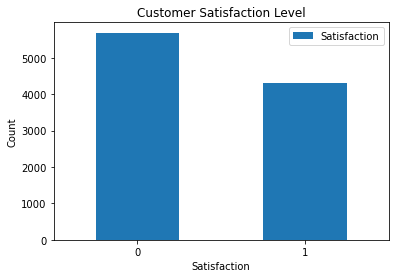

In [10]:
df['satisfaction'].value_counts().plot(kind='bar')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('Customer Satisfaction Level')
plt.legend(['Satisfaction'])

Plot the mean value of satisfaction of male and female customers

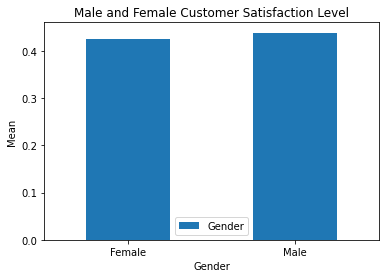

In [11]:
df[['Gender','satisfaction']].groupby('Gender').mean().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Mean')
plt.xticks(rotation=0)
plt.title('Male and Female Customer Satisfaction Level')
plt.legend(['Gender'])

Plot the mean value of satisfaction of customers with respect to Age.

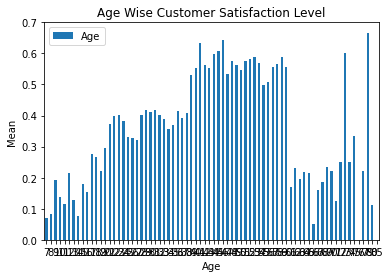

In [12]:
df[['Age','satisfaction']].groupby('Age').mean().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Mean')
plt.xticks(rotation=0)
plt.title('Age Wise Customer Satisfaction Level')
plt.legend(['Age'])

Plot the mean value of satisfaction of customers with respect to Food_and_drink.

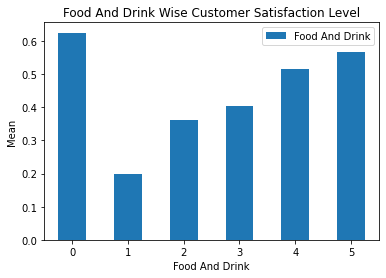

In [13]:
df[['Food and drink','satisfaction']].groupby('Food and drink').mean().plot(kind='bar')
plt.xlabel('Food And Drink')
plt.ylabel('Mean')
plt.xticks(rotation=0)
plt.title('Food And Drink Wise Customer Satisfaction Level')
plt.legend(['Food And Drink'])

Display a boxplot for Flight_Distance

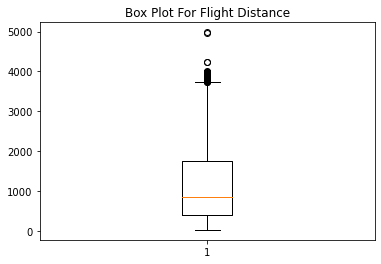

In [14]:
plt.boxplot(df['Flight Distance'])
plt.title('Box Plot For Flight Distance')
plt.show()

Display a boxplot for Checkin_service

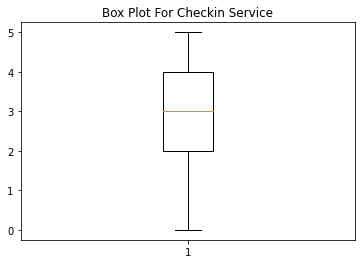

In [15]:
plt.boxplot(df['Checkin service'])
plt.title('Box Plot For Checkin Service')
plt.show()

Find all the Null values

In [16]:
df.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             26
satisfaction                          0
dtype: int64

Drop all the na values

In [17]:
df = df.dropna()

In [18]:
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

Find the unique values in Flight_Distance

In [19]:
df['Flight Distance'].unique()

array([ 460,  235, 1142, ..., 3033, 1319, 1443], dtype=int64)

Perform encoding in columns Gender, Customer_Type, Type_of_Travel, and Class

In [20]:
df.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [21]:
print(df['Gender'].unique())
print(df['Customer Type'].unique())
print(df['Type of Travel'].unique())
print(df['Class'].unique())

['Male' 'Female']
['Loyal_Customer' 'disloyal_Customer']
['Personal_Travel' 'Business_travel']
['Eco_Plus' 'Business' 'Eco']


In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
LE = LabelEncoder()
df[['Gender','Customer Type','Type of Travel','Class']] = df[['Gender','Customer Type','Type of Travel','Class']].apply(LE.fit_transform)

In [24]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,1,0,13,1,2,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,1,1,25,0,0,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,0,0,26,0,0,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,0,0,25,0,0,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,1,0,61,0,0,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


Drop the column id

In [25]:
df.drop(['id'],axis=1,inplace=True)

In [26]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


# Working with model

Create the features and target Data

In [27]:
# Feature data
x = df.drop(['satisfaction'],axis=1)
x.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,13,1,2,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,0,0,26,0,0,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,0,0,25,0,0,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,1,0,61,0,0,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0


In [28]:
# Target data
y = df[['satisfaction']]
y.head()

,satisfaction
0,0
1,0
2,1
3,0
4,1


Perform scaling on features data

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
SS = StandardScaler()

x = SS.fit_transform(x)
x

array([[ 1.022101  , -0.46815207, -1.7390128 , ...,  1.31151575,
         0.2672691 ,  0.07106403],
       [ 1.022101  ,  2.13605805, -0.9454767 , ..., -1.71598135,
        -0.3602227 , -0.23814858],
       [-0.9783769 , -0.46815207, -0.87934869, ...,  1.31151575,
        -0.38636819, -0.39275488],
       ...,
       [-0.9783769 , -0.46815207, -0.01968459, ..., -0.95910708,
        -0.38636819, -0.39275488],
       [ 1.022101  , -0.46815207,  0.83997952, ...,  1.31151575,
        -0.3602227 , -0.10930999],
       [-0.9783769 , -0.46815207,  0.11257143, ...,  0.55464148,
        -0.38636819, -0.39275488]])

Split the data in training and testing sets

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=13)

In [32]:
x_train.shape,y_train.shape

((7979, 22), (7979, 1))

In [33]:
x_test.shape,y_test.shape

((1995, 22), (1995, 1))

Fit the decision tree model with various parameters

In [34]:
DT = DecisionTreeClassifier(random_state=2)

In [35]:
DT.fit(x_train,y_train)

DecisionTreeClassifier(random_state=2)

In [36]:
DT.score(x_train,y_train)

1.0

In [37]:
DT.score(x_test,y_test)

0.9157894736842105

Create a function to display precision score, recall score, accuracy, classification report, confusion matrix, F1 Score

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [39]:
def model_score(xt):
    y_pred = DT.predict(xt)
    print("Accuracy Score:\n",accuracy_score(y_test,y_pred),"\n",sep="")
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred),"\n",sep="")
    print("Precision Score:\n",precision_score(y_test,y_pred),"\n",sep="")
    print("Recall Score:\n",recall_score(y_test,y_pred),"\n",sep="")
    print("F1 Score:\n",f1_score(y_test,y_pred),"\n",sep="")
    print("Classification Report:\n",classification_report(y_test,y_pred),sep="")

In [40]:
model_score(x_test)

Accuracy Score:
0.9157894736842105

Confusion Matrix:
[[1023   86]
 [  82  804]]

Precision Score:
0.903370786516854

Recall Score:
0.90744920993228

F1 Score:
0.9054054054054055

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1109
           1       0.90      0.91      0.91       886

    accuracy                           0.92      1995
   macro avg       0.91      0.91      0.91      1995
weighted avg       0.92      0.92      0.92      1995

